In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression

In [3]:
titanic = sns.load_dataset('titanic')

In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [14]:
titanic.isnull().sum()


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [13]:
titanic.isnull().sum()['age']/titanic.shape[0] * 100
titanic.isnull().sum()['deck']/titanic.shape[0] * 100

np.float64(77.21661054994388)

<Axes: >

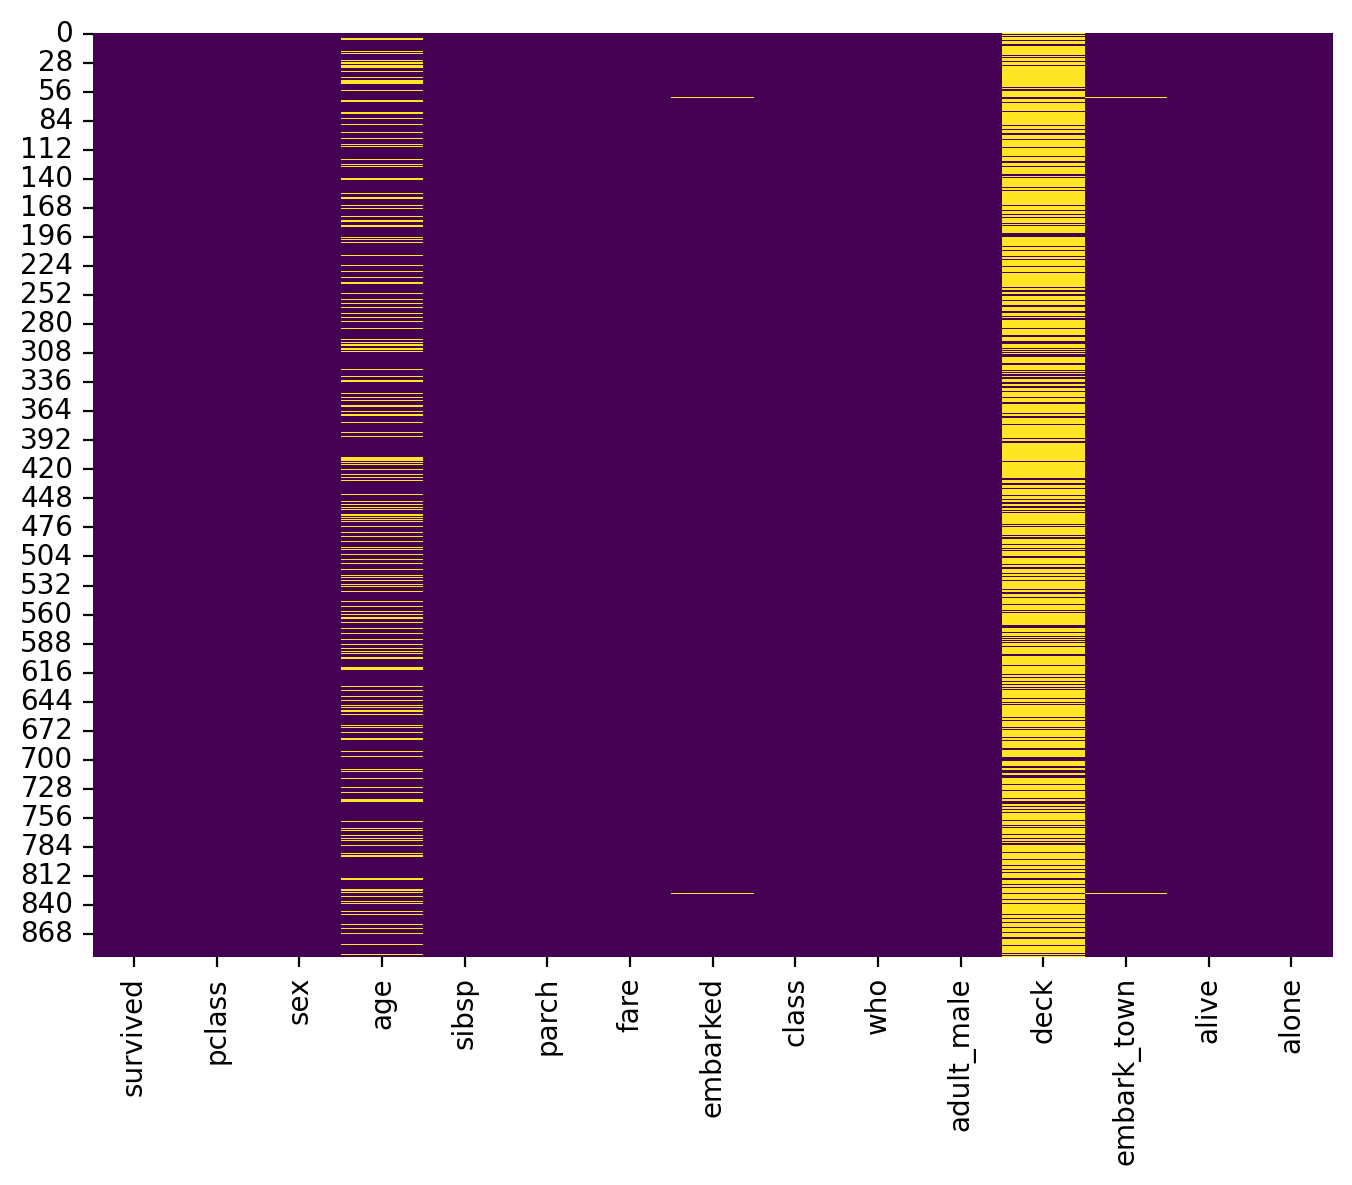

In [35]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['figure.dpi'] = 200
sns.heatmap(titanic.isnull(), cbar=False, cmap='viridis')

<Axes: >

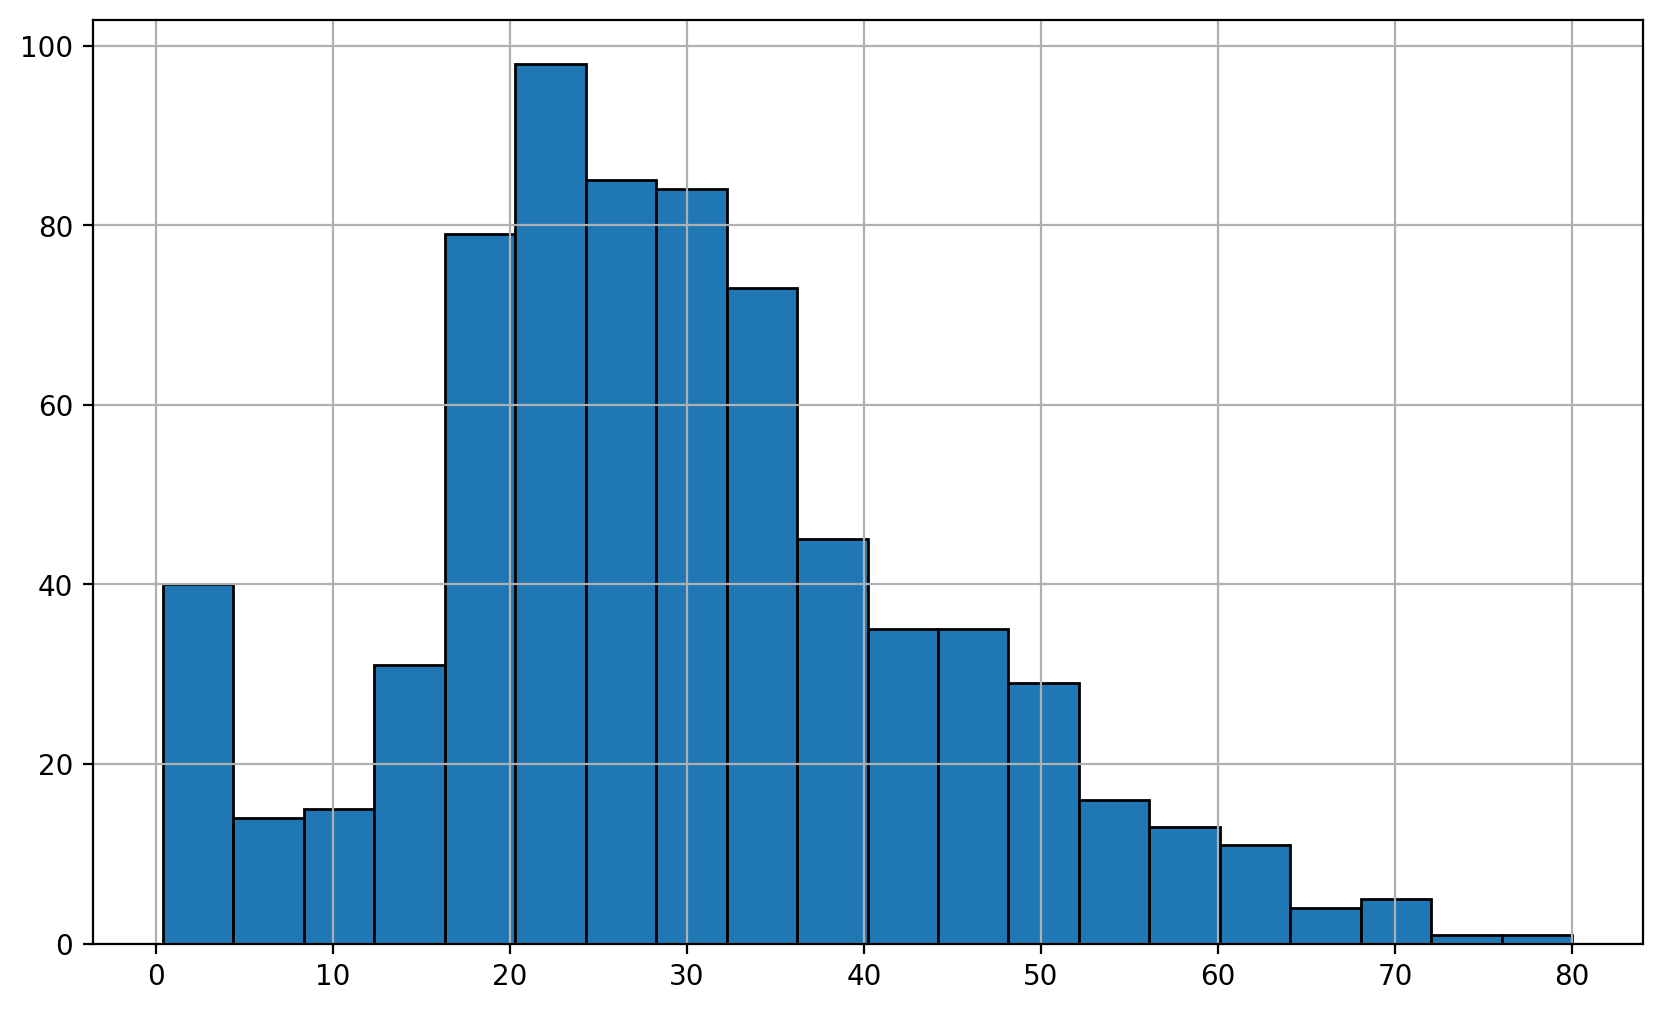

In [33]:
titanic['age'].hist(bins=20, edgecolor='black')

Text(0.5, 0, 'Age')

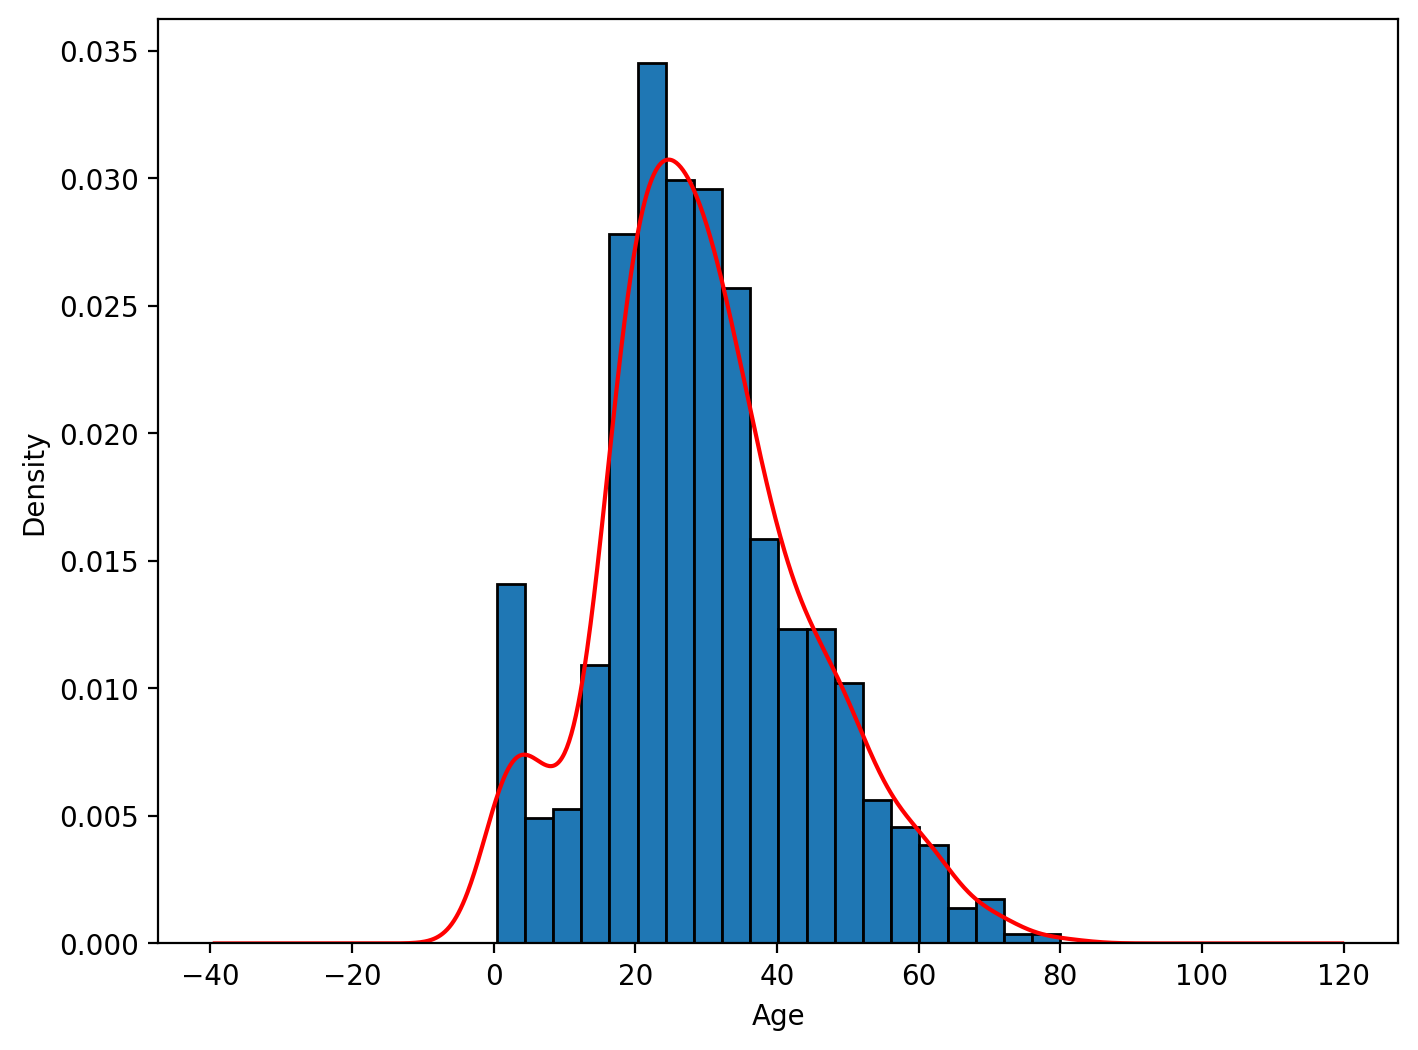

In [41]:
ax = titanic['age'].hist(bins=20, edgecolor='black', density=True)

titanic['age'].plot(kind='density', ax=ax, color='red')
ax.set_xlabel('Age')


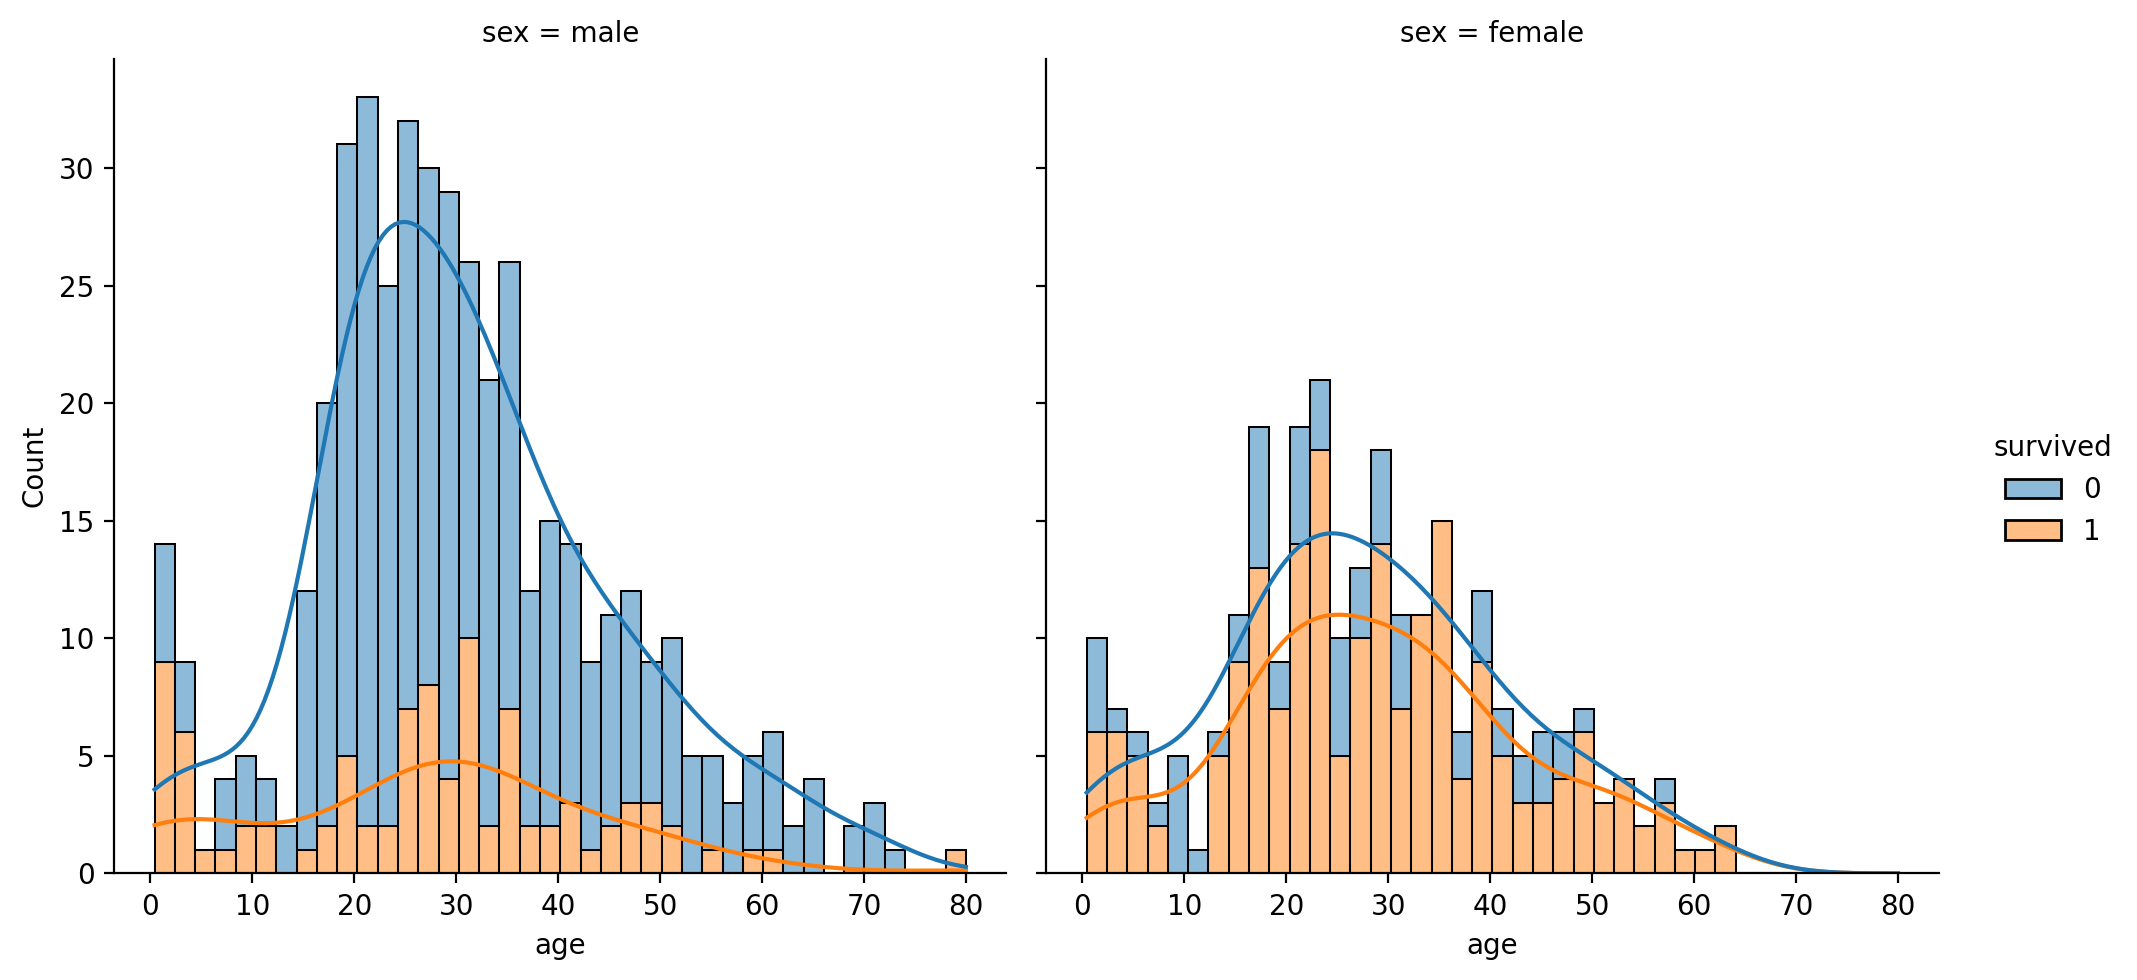

In [53]:
sns.displot(data = titanic, x = 'age', kde = True, bins = 40, edgecolor = 'black', color = 'blue',
            hue = 'survived', multiple = 'stack', col = 'sex')

In [55]:
titanic['sex'].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [56]:
titanic[titanic['survived'] == 1]['sex'].value_counts()

sex
female    233
male      109
Name: count, dtype: int64

In [60]:
fem = 233/314
men = 109/577

In [67]:
print(f"{int(men*100)}% percent of men survived \n{int(fem*100)}% percent of women survived")

18% percent of men survived 
74% percent of women survived


In [74]:
total_mean_age = titanic['age'].mean()

In [75]:
mean_age_men = titanic[titanic['sex'] == 'male']['age'].mean()
mean_age_women = titanic[titanic['sex'] == 'female']['age'].mean()

In [76]:
print("Percentage")
print(f"Total mean age: {total_mean_age:.2f}")
print(f"mean age of men {mean_age_men:.2f}")
print(f"mean age of women {mean_age_women:.2f}")

Percentage
Total mean age: 29.70
mean age of men 30.73
mean age of women 27.92


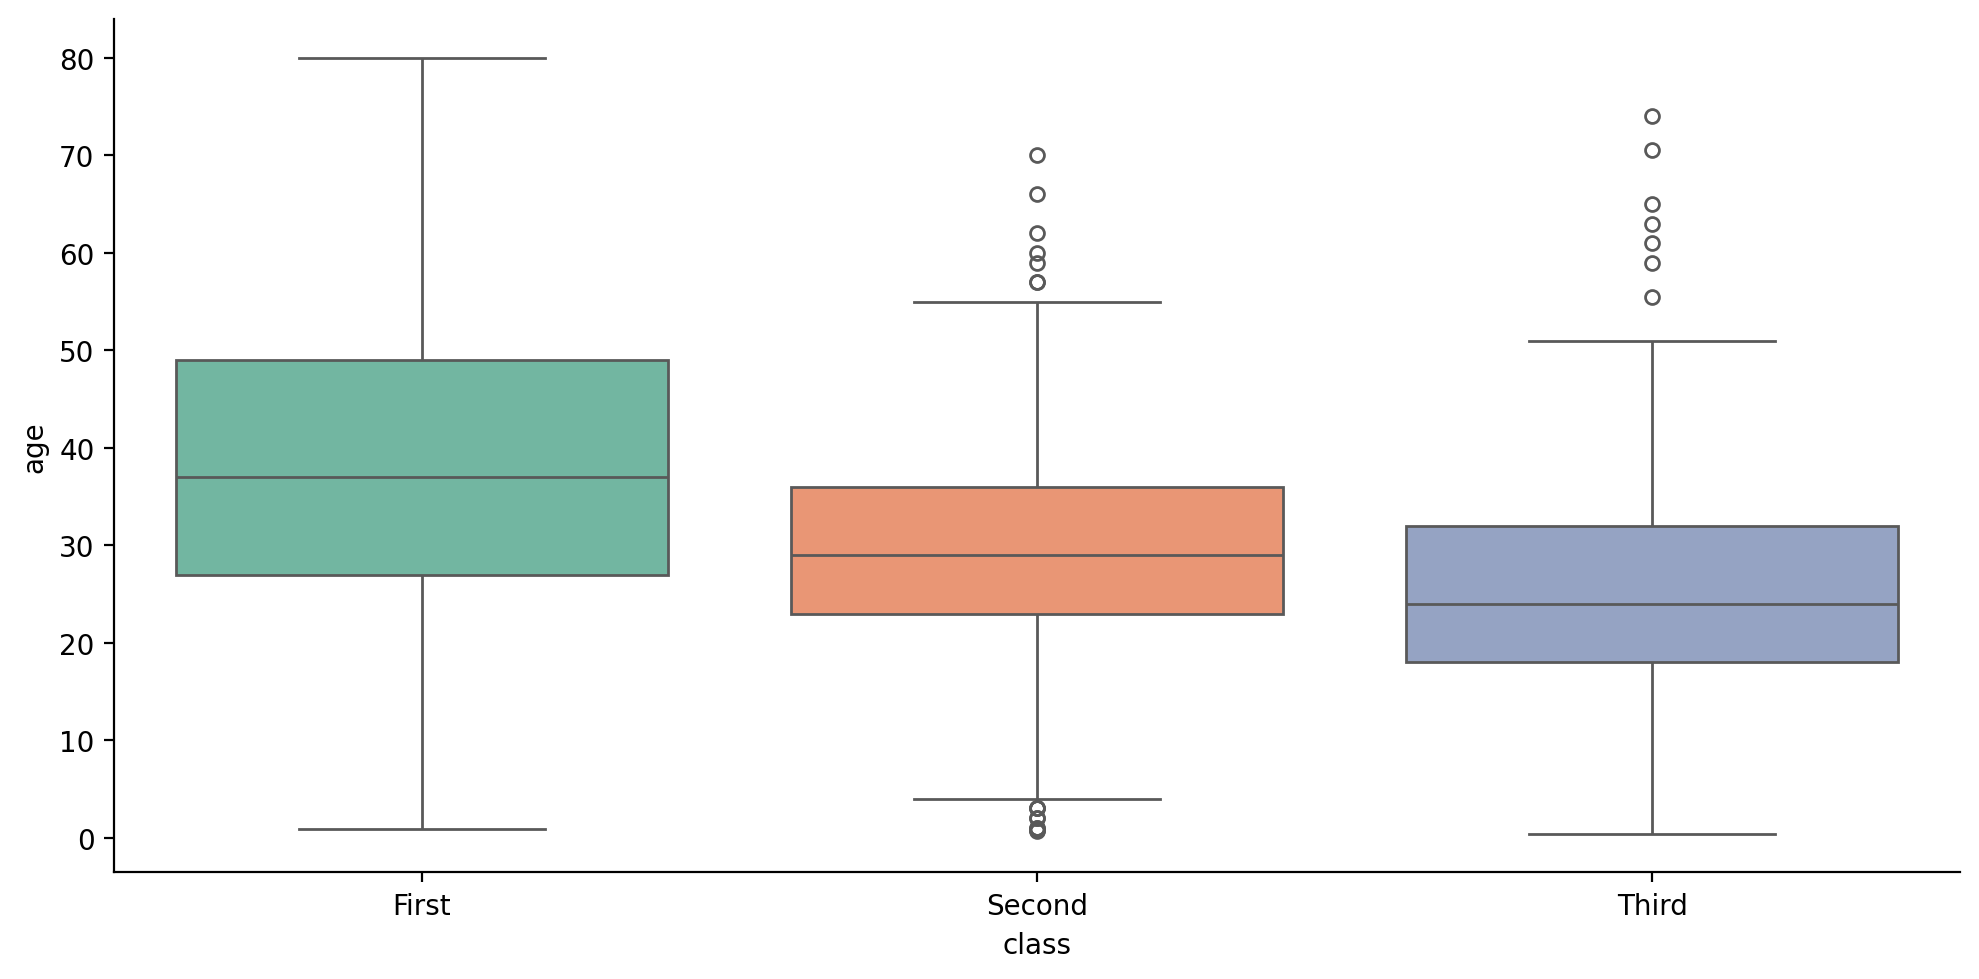

In [84]:
sns.catplot(data=titanic, x='class', y='age', kind='box',
            hue='class', legend=False,
            height=5, aspect=2, palette='Set2')